# Flight Booking price prediction

- The objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it. 

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Import the data

In [2]:
data = pd.read_csv('Flight_Booking.csv')

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Data Wrangling

In [4]:
data= data.drop(columns=['Unnamed: 0'])

In [5]:
data.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [6]:
print (data.shape)

(300153, 11)


In [7]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
data.duplicated().sum()

0

### Data Visualization

* Lineplot showing prices of different airlines

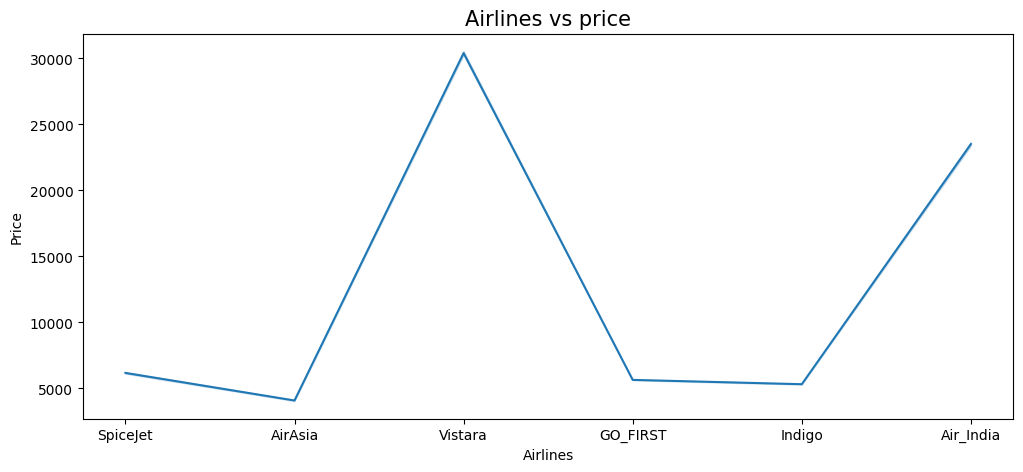

In [11]:
plt.figure(figsize =(12,5))
sns.lineplot(x= data['airline'], y= data['price'])
plt.title ('Airlines vs price', fontsize = 15)
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()

- There is a variation in price with
different airlines

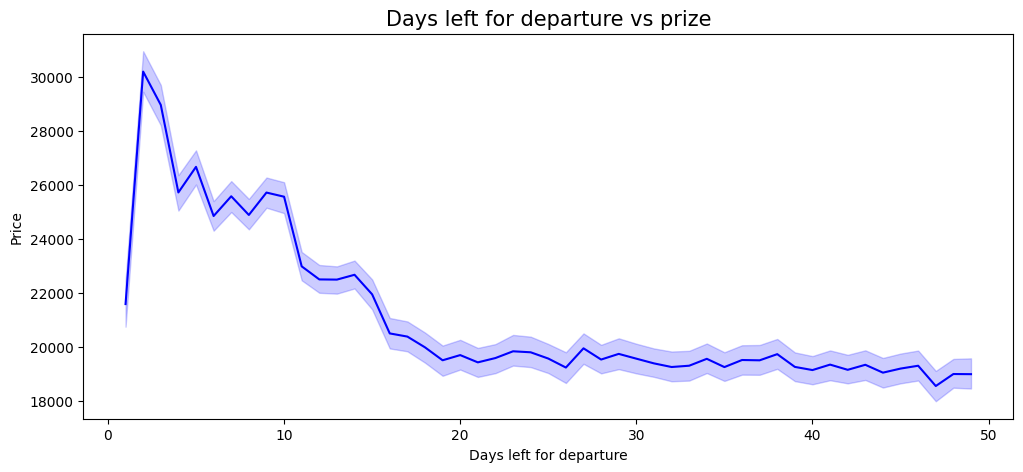

In [12]:
plt.figure(figsize =(12,5))
sns.lineplot(data=data, x = 'days_left', y = 'price', color = 'blue')
plt.title ('Days left for departure vs prize', fontsize = 15)
plt.xlabel('Days left for departure')
plt.ylabel('Price')
plt.show()

- The price of the ticket
increases as the days left for
departure decreases 

Text(0.5, 1.0, 'Price range of flights')

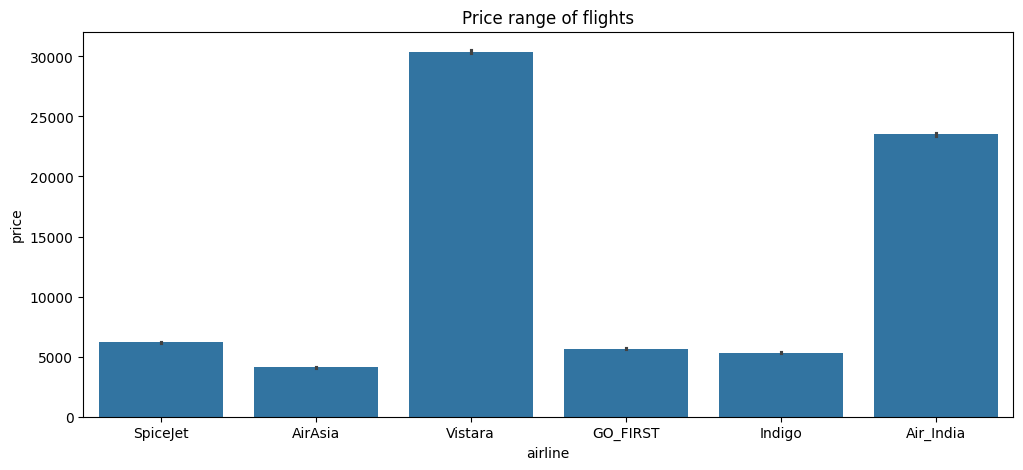

In [13]:
plt.figure(figsize =(12,5))
sns.barplot(data=data, x = 'airline', y = 'price',)
plt.title('Price range of flights')

- Price range of all the flights.
- Vistara is recorded highest price range

Text(0.5, 1.0, 'Range of price - Economy and Business class')

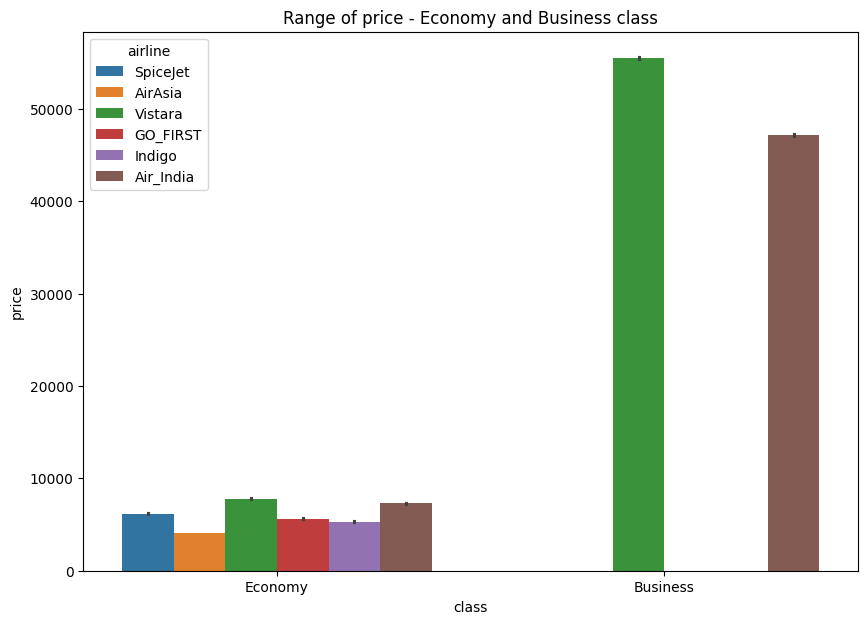

In [14]:
plt.figure(figsize =(10,7))
sns.barplot(data=data, x = 'class', y = 'price', hue = 'airline')
plt.title('Range of price - Economy and Business class')

Text(0.5, 1.0, 'Range of price of flights with source and destination city')

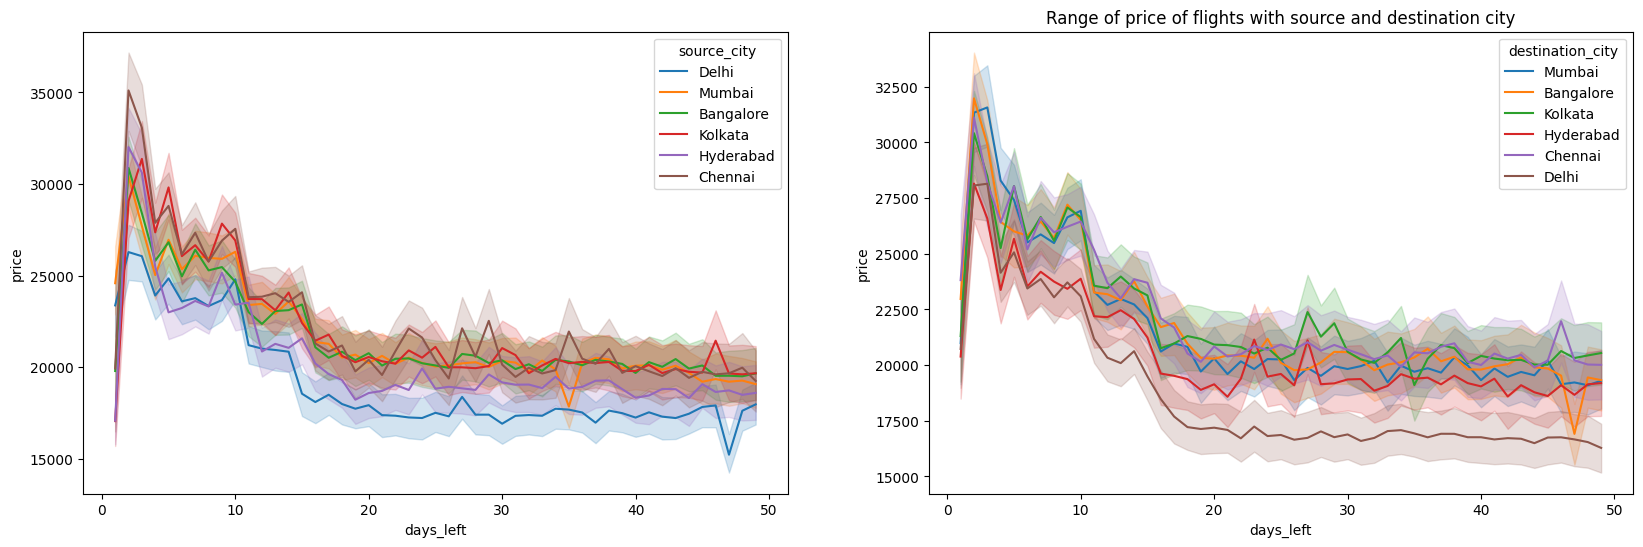

In [15]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data=data, x = 'days_left', y = 'price', hue = 'source_city', ax=ax[0])
sns.lineplot(data=data, x = 'days_left', y = 'price', hue = 'destination_city', ax=ax[1])
plt.title('Range of price of flights with source and destination city')

### Visualization of categorical features with countplot

In [16]:
data.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


Text(0.5, 1.0, 'Frequency of class')

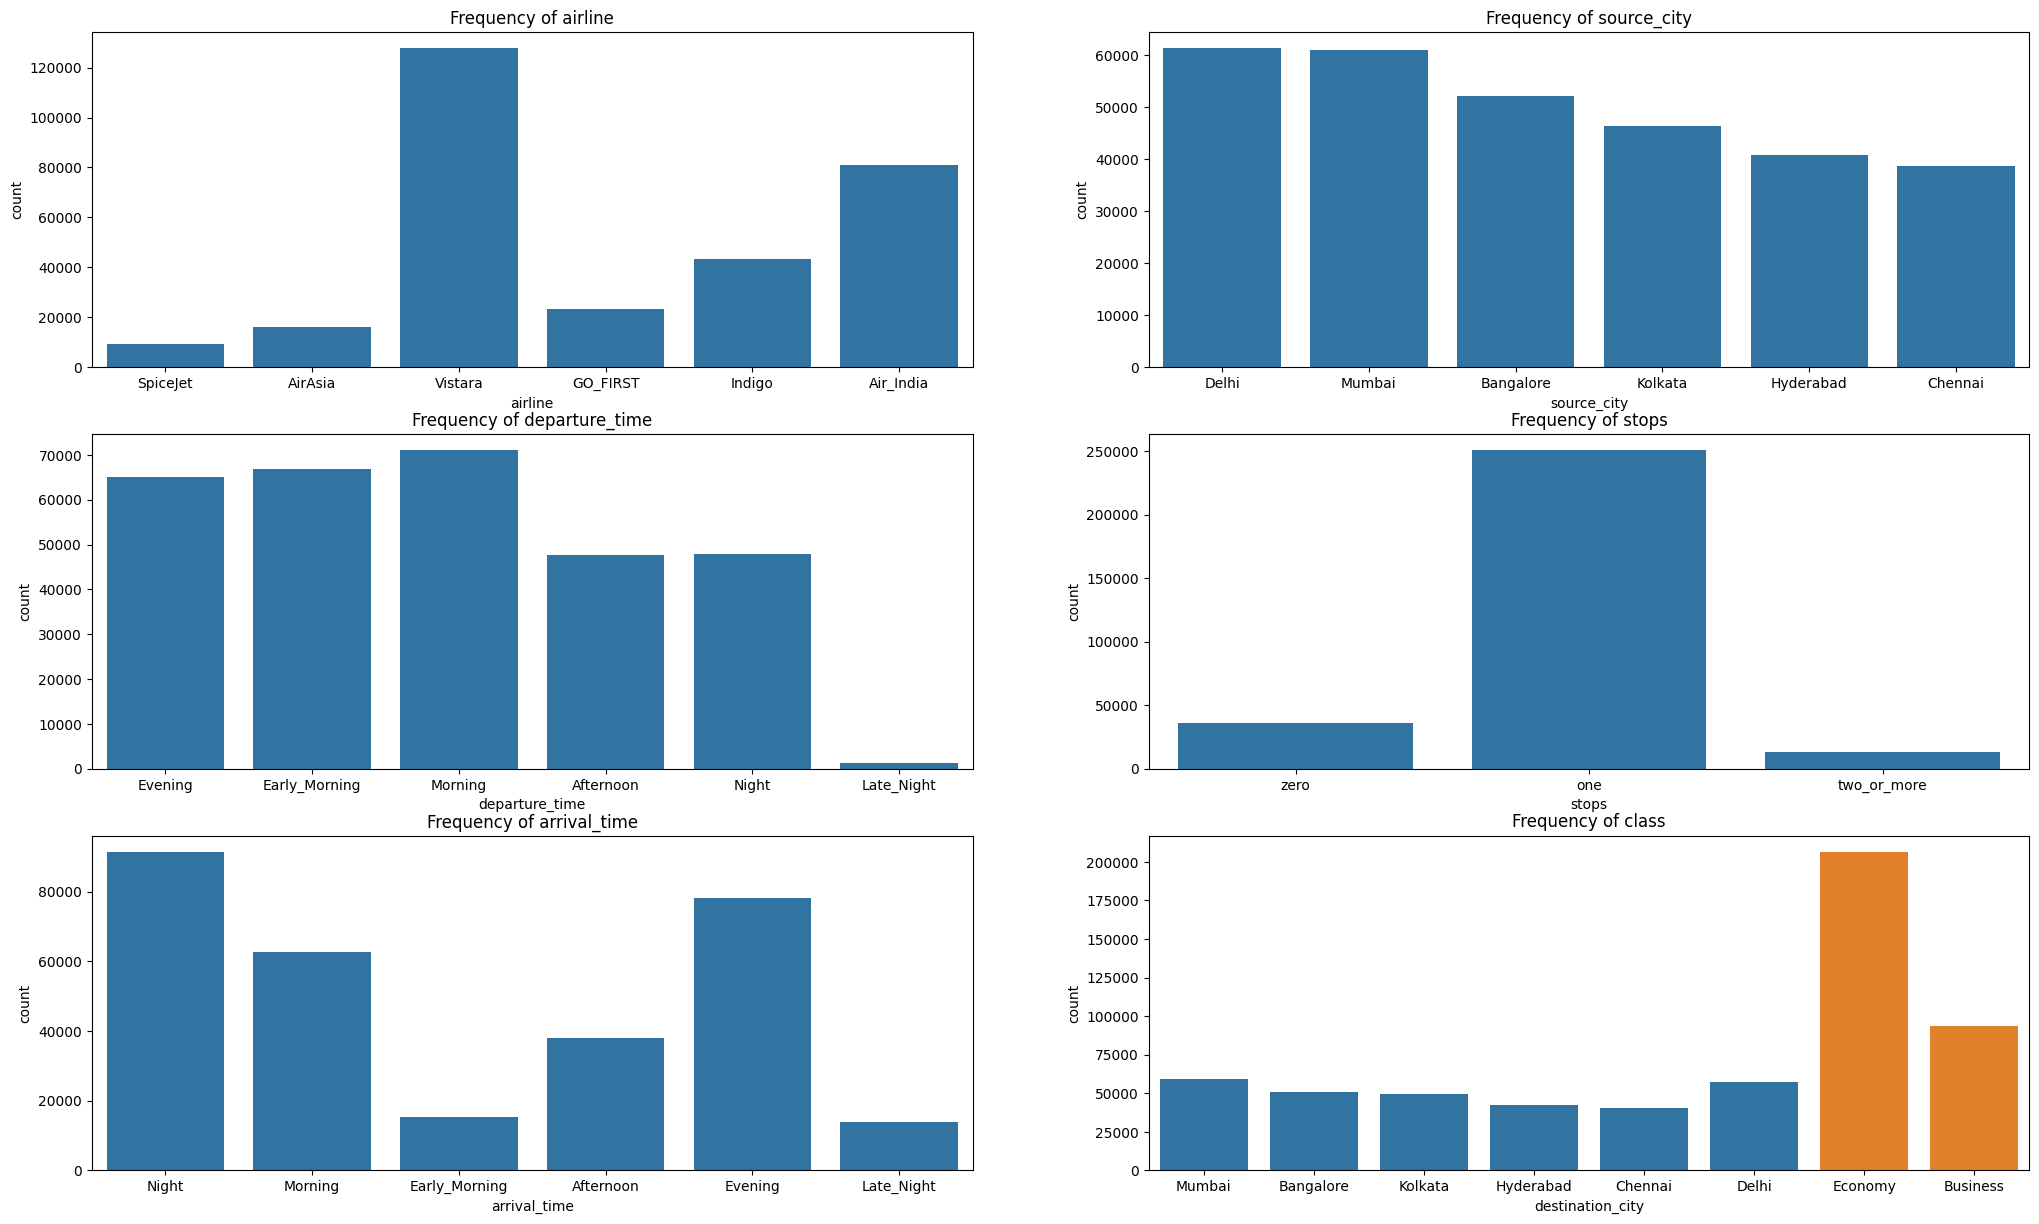

In [17]:
plt.figure(figsize=(25,20))

plt.subplot(4,2,1)
sns.countplot(x=data['airline'], data=data)
plt.title('Frequency of airline')

plt.subplot(4,2,2)
sns.countplot(x=data['source_city'], data=data)
plt.title('Frequency of source_city')

plt.subplot(4,2,3)
sns.countplot(x=data['departure_time'], data=data)
plt.title('Frequency of departure_time')

plt.subplot(4,2,4)
sns.countplot(x=data['stops'], data=data)
plt.title('Frequency of stops')

plt.subplot(4,2,5)
sns.countplot(x=data['arrival_time'], data=data)
plt.title('Frequency of arrival_time')

plt.subplot(4,2,6)
sns.countplot(x=data['destination_city'], data=data)
plt.title('Frequency of destination_city')

plt.subplot(4,2,6)
sns.countplot(x=data['class'], data=data)
plt.title('Frequency of class')

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['airline']= le.fit_transform(data['airline'])
data['source_city']= le.fit_transform(data['source_city'])
data['departure_time']= le.fit_transform(data['departure_time'])
data['stops']= le.fit_transform(data['stops'])
data['arrival_time']= le.fit_transform(data['arrival_time'])
data['destination_city']= le.fit_transform(data['destination_city'])
data['class']= le.fit_transform(data['class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


### Feature Selection

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15920\60054353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap = 'coolwarm')


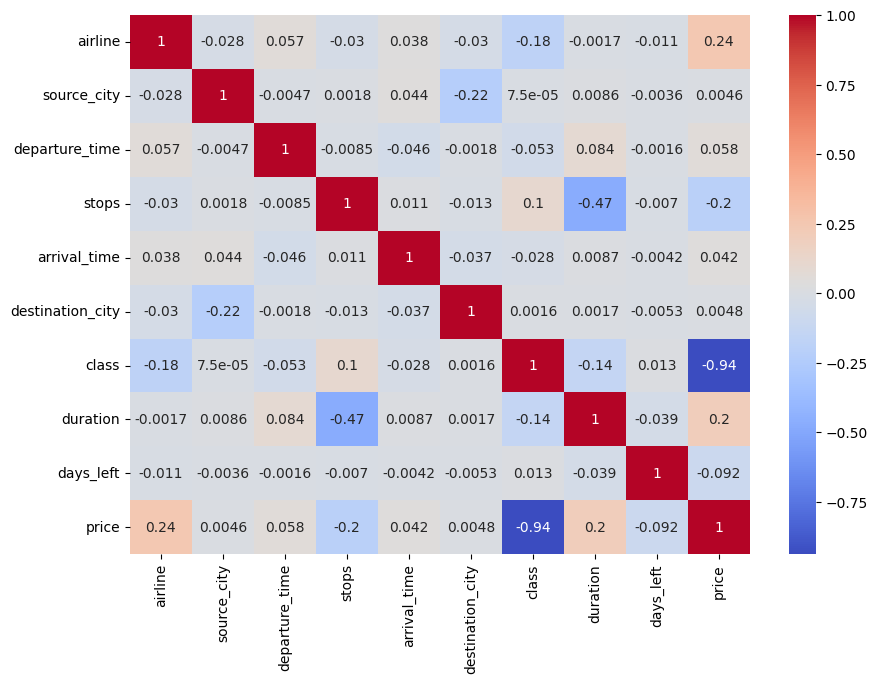

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap = 'coolwarm')
plt.show()

In [20]:
!pip install statsmodels

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if((data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

x = data[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i)
                   for i in range (len(x.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


### Linear Regression

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [23]:
# Separate features (X) and target (y)
x = data.drop(columns=['price'])
y = data['price']

In [24]:
# Ensure all non-numeric columns are dropped or encoded
x = pd.get_dummies(x, drop_first=True)  # One-hot encode categorical variables if needed

In [25]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train the linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)  # Fit the model to the training data

# Make predictions on the test set
y_pred = lr.predict(x_test)

In [27]:
# Create a DataFrame to compare actual vs predicted values
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=['Actual_Value', 'Predicted_Value'])

# Print the difference
difference

,Actual_Value,Predicted_Value
0,7366.0,5375.054672
1,64831.0,56277.754867
2,6195.0,12608.896469
3,60160.0,53605.763656
4,6578.0,11052.306625
...,...,...
60026,5026.0,4478.205062
60027,3001.0,3252.054672
60028,6734.0,6397.486312
60029,5082.0,3427.120101


#### For Regression (R² Score):

In [28]:
from sklearn.metrics import r2_score

In [29]:
from sklearn.linear_model import Ridge

# Use Ridge Regression instead of Linear Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)

# Make predictions and calculate R² score
y_pred_ridge = ridge_reg.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Score with Ridge Regression: {r2_ridge}")


R² Score with Ridge Regression: 0.9209281708957988


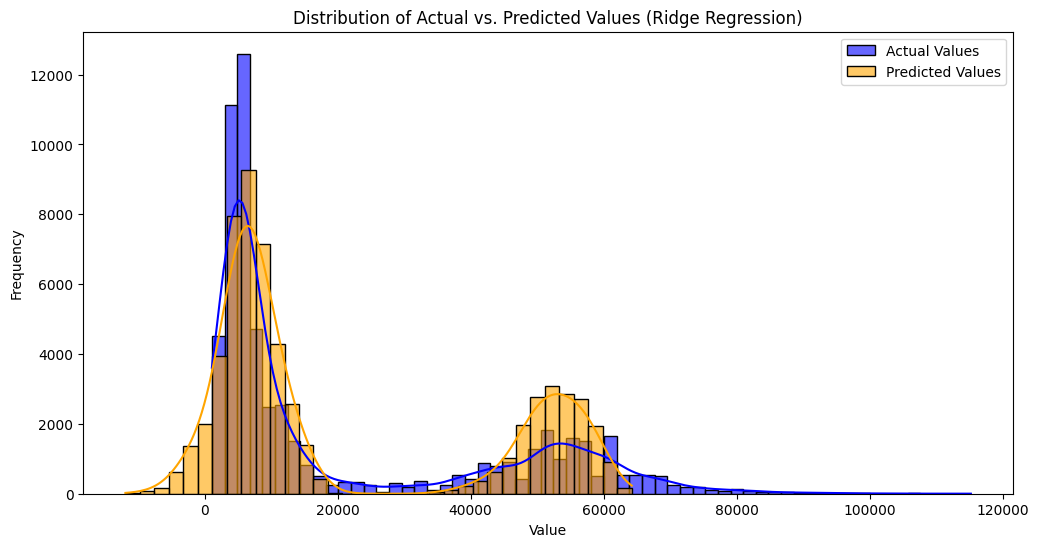

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the actual values and y_pred_ridge contains the predicted values

plt.figure(figsize=(12, 6))

# Plot histogram for actual values
sns.histplot(y_test, kde=True, color='blue', label='Actual Values', alpha=0.6)

# Plot histogram for predicted values
sns.histplot(y_pred_ridge, kde=True, color='orange', label='Predicted Values', alpha=0.6)

# Adding title and labels
plt.title('Distribution of Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [30]:
print(y_pred.shape)
print(y_test.shape)


(60031,)
(60031,)


In [31]:
y_pred = y_pred.astype('float32')
y_test = y_test.astype('float32')


In [32]:
sample_size = 10000  # Adjust size as needed
y_pred_sample = y_pred[:sample_size]
y_test_sample = y_test[:sample_size]


In [33]:
print(np.max(y_pred))
print(np.min(y_pred))


1253439000000000.0
-11903.456


In [34]:
Q1 = np.percentile(y_pred, 25)
Q3 = np.percentile(y_pred, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (y_pred < lower_bound) | (y_pred > upper_bound)
print(f"Number of outliers: {np.sum(outliers)}")


Number of outliers: 3


In [35]:
y_pred_clipped = np.clip(y_pred, lower_bound, upper_bound)


In [36]:
print(y_pred.shape)
print(y_test.shape)

(60031,)
(60031,)


In [46]:
import numpy as np
import pandas as pd

# Combine actual and predicted values into a DataFrame
difference = pd.DataFrame({'Actual_Value': y_test, 'Predicted_Value': y_pred_ridge})

# Filter out rows where the predicted values are negative
difference = difference[difference['Predicted_Value'] >= 0]

# Check the filtered DataFrame
print(difference)


        Actual_Value  Predicted_Value
27131         7366.0      5385.497963
266857       64831.0     56268.182798
141228        6195.0     12599.642155
288329       60160.0     53596.254143
97334         6578.0     11062.803327
...              ...              ...
5234          5026.0      4488.718561
5591          3001.0      3254.049575
168314        6734.0      6408.067662
175191        5082.0      3429.191775
287693       66465.0     56432.317218

[56850 rows x 2 columns]


In [48]:
print(np.max(y_pred))
print(np.min(y_pred))

116562.0
1105.0


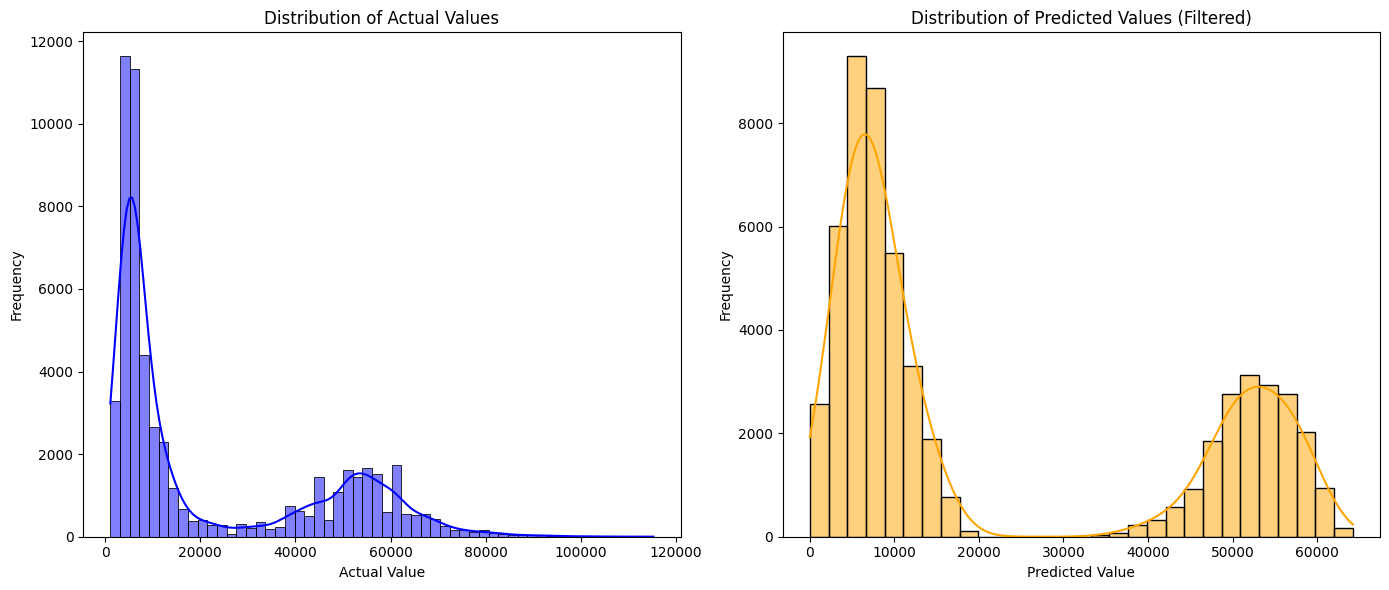

In [52]:
# Assuming difference DataFrame has already been created and negative outliers have been removed
# Combine actual and predicted values into a DataFrame again, if not already done
difference = pd.DataFrame({'Actual_Value': y_test, 'Predicted_Value': y_pred_ridge})

# Filter out rows where the predicted values are negative
difference = difference[difference['Predicted_Value'] >= 0]

# Plot the histograms
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for actual values
sns.histplot(difference['Actual_Value'], kde=True, color='blue', ax=ax[0])
ax[0].set_title('Distribution of Actual Values')
ax[0].set_xlabel('Actual Value')
ax[0].set_ylabel('Frequency')

# Plot histogram for filtered predicted values
sns.histplot(difference['Predicted_Value'], kde=True, color='orange', ax=ax[1])
ax[1].set_title('Distribution of Predicted Values (Filtered)')
ax[1].set_xlabel('Predicted Value')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Decision Tree Regression

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [39]:
# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [40]:
# Predict on the test set
y_pred = dt_regressor.predict(x_test)


In [41]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 8930069.710903533
R² Score: 0.9826762816709925


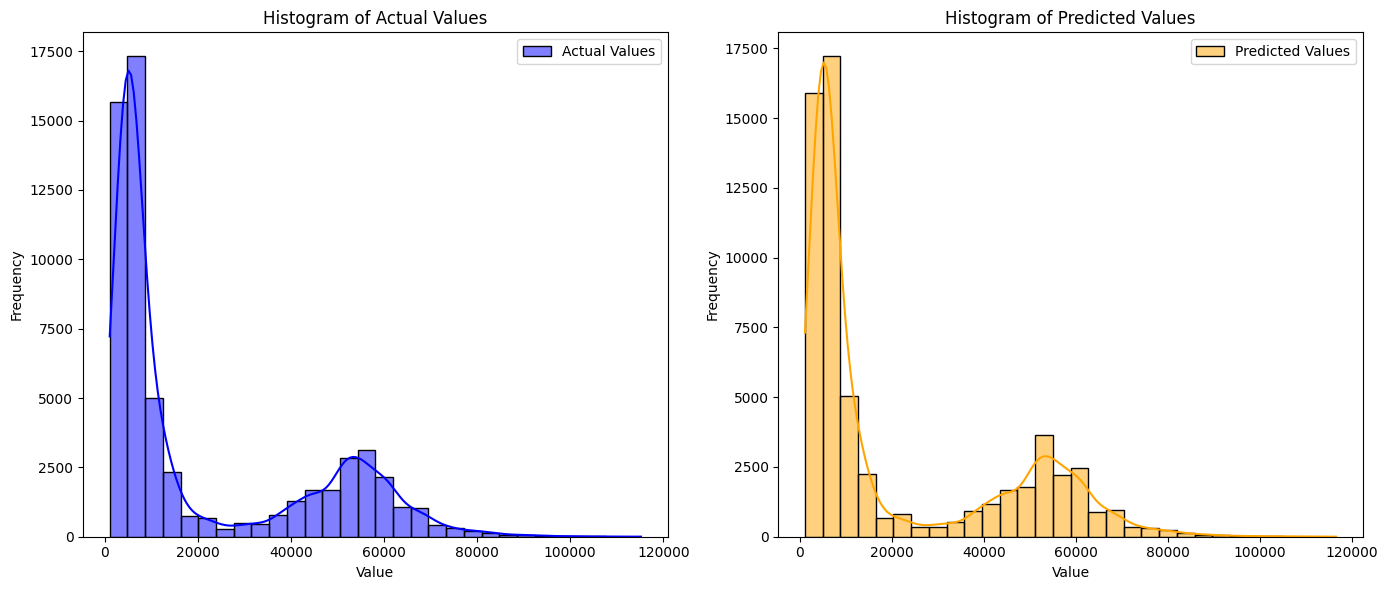

In [42]:
plt.figure(figsize=(14, 6))

# Plot histogram of actual values
plt.subplot(1, 2, 1)
sns.histplot(y_test, kde=True, color='blue', bins=30, label='Actual Values')
plt.title('Histogram of Actual Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Plot histogram of predicted values
plt.subplot(1, 2, 2)
sns.histplot(y_pred, kde=True, color='orange', bins=30, label='Predicted Values')
plt.title('Histogram of Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
